Preliminary analysis of EDDMaps dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# EDDMaps dataset
slf_df = pd.read_csv("CS4824CapstoneData/EDDMapS_dirty.csv", encoding='latin-1')
print(slf_df.shape)
# Drop columns that are missing
slf_df = slf_df.dropna(axis=1, how="all")

# Convert date columns to pandas datetime 
slf_df["ObsDate"] = pd.to_datetime(slf_df["ObsDate"], errors="coerce")
slf_df["DateEnt"] = pd.to_datetime(slf_df["DateEnt"], errors="coerce")
slf_df["DateUp"] = pd.to_datetime(slf_df["DateUp"], errors="coerce")
print(slf_df.columns)
missing = slf_df.isnull().sum().sort_values(ascending=False)
missing.head(10)

(26132, 79)
Index(['objectid', 'reporter', 'RecOwner', 'SciName', 'ComName', 'Nativity',
       'OccStatus', 'Status', 'ObsDate', 'DateEnt', 'DateUp', 'Location',
       'Latitude', 'Longitude', 'Datum', 'Method', 'CoordAcc', 'InfestAcre',
       'GrossAcre', 'Density', 'Quantity', 'QuantityU', 'APPXQuant',
       'NumCollect', 'Incidence', 'Severity', 'Host', 'Host_Name',
       'HostDamage', 'ManageStat', 'Habitat', 'LocalOwner', 'Site', 'RecBasis',
       'Museum', 'Voucher', 'ObsIDer', 'CollectTme', 'UUID', 'OrgSrcID',
       'OrigName', 'RecSrcTyp', 'Surveyor', 'DateAcc', 'Phenology',
       'LifeStatus', 'Sex', 'PID', 'TreatComm', 'Reference', 'Locality',
       'Comments', 'ReviewDate', 'Reviewer', 'VerifyMthd', 'Verified',
       'IDCred', 'ReviewComm'],
      dtype='object')


/tmp/ipykernel_39421/2166319549.py:2: DtypeWarning: Columns (15,23,25,26,27,30,31,32,33,35,38,39,40,42,48,60,61,62,69,71,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  slf_df = pd.read_csv("CS4824CapstoneData/EDDMapS_dirty.csv", encoding='latin-1')


Site          26131
Host          26131
LifeStatus    26130
LocalOwner    26129
DateAcc       26126
Incidence     26118
Severity      26115
NumCollect    26103
GrossAcre     26102
Museum        26090
dtype: int64

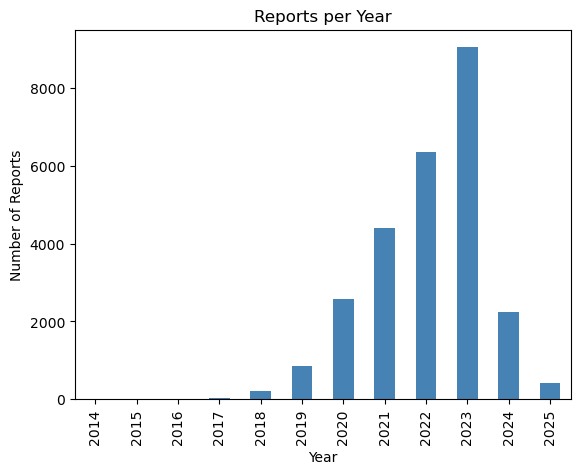

In [3]:
# Reports per year plot

slf_df["year"] = slf_df["ObsDate"].dt.year

slf_df["year"].value_counts().sort_index().plot(
    kind="bar", title="Reports per Year", color="steelblue"
)
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.show()


In [4]:
# Encode infestation status
print(slf_df['Status'].unique)
status_map = {
    'Positive': 1,
    'Negative': 0,
}
slf_df['Status_encoded'] = slf_df['Status'].map(status_map)
slf_df['Status_encoded'].value_counts()


# Clean and split location 
slf_df['Location_clean'] = slf_df['Location'].str.replace('"', '')

slf_df[['County', 'State', 'Country']] = (
    slf_df['Location_clean']
    .str.split(',', expand=True)
)

# Strip whitespace
slf_df['County'] = slf_df['County'].str.strip()
slf_df['State'] = slf_df['State'].str.strip()
slf_df['Country'] = slf_df['Country'].str.strip()

slf_df = slf_df.drop(columns=['Location_clean'])

# Clean EDDMapS county/state
slf_df["County"] = (
    slf_df["County"]
    .astype(str)
    .str.replace(" County", "", case=False)
    .str.replace(" Parish", "", case=False)
    .str.lower()
    .str.strip()
)
slf_df["State"] = (
    slf_df["State"]
    .astype(str)
    .str.lower()
    .str.strip()
)
slf_df = slf_df.rename(columns={'County': 'county'})   
slf_df = slf_df.rename(columns={'State': 'state'})   
print(slf_df['Status_encoded'].value_counts())

slf_df.head()

<bound method Series.unique of 0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
26127    Positive
26128    Positive
26129    Positive
26130    Positive
26131    Positive
Name: Status, Length: 26132, dtype: object>
Status_encoded
1.0    26078
0.0       19
Name: count, dtype: int64


,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm,year,Status_encoded,county,state,Country
0,4999651,Dawn Stelts Native Habitat Developers LLC,Unknown,Lycorma delicatula,spotted lanternfly,Introduced,Detected,Positive,2017-08-10,2017-08-10,...,Rebekah Wallace,Bulk Verified,Verified,Credible,"""""",2017,1.0,lehigh,pennsylvania,United States
1,7629151,heather cuthbert t & a ecological research,Unknown,Lycorma delicatula,spotted lanternfly,Introduced,Detected,Positive,2018-07-05,2018-07-05,...,Bad Bug Pennsylvania,Photographs,Verified,Verified,"""""",2018,1.0,berks,pennsylvania,United States
2,7629152,heather cuthbert t & a ecological research,Unknown,Lycorma delicatula,spotted lanternfly,Introduced,Detected,Positive,2018-07-05,2018-07-05,...,Rebekah Wallace,Bulk Verified,Verified,Credible,"""""",2018,1.0,berks,pennsylvania,United States
3,7638053,Richard Gardner self,Unknown,Lycorma delicatula,spotted lanternfly,Introduced,Detected,Positive,2018-07-30,2018-07-30,...,Rebekah Wallace,Bulk Verified,Verified,Credible,"""""",2018,1.0,berks,pennsylvania,United States
4,7811998,Richard Gardner self,Unknown,Lycorma delicatula,spotted lanternfly,Introduced,Detected,Positive,2018-09-21,2018-09-21,...,Rebekah Wallace,Bulk Verified,Verified,Credible,"""""",2018,1.0,berks,pennsylvania,United States


In [5]:
# Define relevent columns
useful_cols = [
    "objectid", "ObsDate", "year",
    "county", "state", "Status_encoded"
]
slf_df_useful = slf_df[useful_cols].copy()
slf_df_useful.head()

,objectid,ObsDate,year,county,state,Status_encoded
0,4999651,2017-08-10,2017,lehigh,pennsylvania,1.0
1,7629151,2018-07-05,2018,berks,pennsylvania,1.0
2,7629152,2018-07-05,2018,berks,pennsylvania,1.0
3,7638053,2018-07-30,2018,berks,pennsylvania,1.0
4,7811998,2018-09-21,2018,berks,pennsylvania,1.0


In [6]:
# FIPS data
fips_df = pd.read_csv(
    "https://raw.githubusercontent.com/kjhealy/fips-codes/refs/heads/master/state_and_county_fips_master.csv"
).dropna()


urban_rural = pd.read_csv("CS4824CapstoneData/urban_rural_classification.csv")
urban_rural[["urban_code", "urban_description"]] = urban_rural["2023 Code"].str.split(" - ", expand=True)
urban_rural["urban_code"] = urban_rural["urban_code"].astype(int)

# State lookup
state_lookup = pd.read_csv("CS4824CapstoneData/States2010.csv")
state_lookup["Name"] = state_lookup["Name"].str.lower().str.strip()
state_lookup["Abbrev"] = state_lookup["Abbrev"].str.lower().str.strip()

In [7]:
# Clean FIPS data
fips_df["fips"] = fips_df["fips"].astype(str).str.zfill(5)
fips_df["County"] = (
    fips_df["name"]
    .astype(str)
    .str.replace(" County", "", case=False)
    .str.lower()
    .str.strip()
)
fips_df["State"] = fips_df["state"].astype(str).str.lower().str.strip()


In [8]:
# Save cleaned data
slf_df_useful.to_csv("CS4824CapstoneData/EDDMapS/EDDMapS_clean.csv", index=False)
fips_df.to_csv("CS4824CapstoneData/fips_clean.csv", index=False)
urban_rural.to_csv("CS4824CapstoneData/urban_rural_clean.csv", index=False)
state_lookup.to_csv("CS4824CapstoneData/state_lookup_clean.csv", index=False)
